# Supervised learning methods for classification
Methods: 
- KNN      
- XGboost      
- CatBoost
- LightGBM

### Global settings

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score


In [12]:
split_type = 'random'

TRAIN_DIR = f'../data/{split_type}split/train/'
TEST_DIR = f'../data/{split_type}split/test/'


float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]

# float_number = float_numbers[1]
# float_number = '4903054' # 1
# float_number = '4903217' # 4
# float_number = '4903052' # 0
float_number = '4903220' # 6
# float_number = '4903218' # 5




TRAIN_FILE = os.path.join(TRAIN_DIR, f'PR_PF_{float_number}.csv')
TEST_FILE = os.path.join(TEST_DIR, f'PR_PF_{float_number}.csv')

RESULT_DIR = f'../results/{split_type}split/{float_number}'

os.makedirs(RESULT_DIR, exist_ok=True)

In [13]:
def comp_ratio(dataset):
    ''' Compute anomaly ratio
    '''
    instance = dataset[(dataset['Label']==1)]
    rate=len(instance)/len(dataset)*100
    return round(rate,2), len(instance)

In [14]:
# float_number = '3901684'
# float_number = '4903217'
# float_number = '4902919'


# TRAIN_FILE = f'../data/randomtrain/PR_PF_{float_number}.csv'
# TEST_FILE = f'../data/randomtest/PR_PF_{float_number}.csv'


### Load data

In [15]:
train_data = pd.read_csv(TRAIN_FILE)
test_data = pd.read_csv(TEST_FILE)
train_data.drop(['ID', 'Date'], axis=1, inplace=True)
test_data.drop(['ID', 'Date'], axis=1, inplace=True)
train_data.head()


,Normalized_date,Latitude,Longitude,Pressure,Salinity,Temperature,Label
0,-0.007511,0.428336,1.083458,2.124949,-1.307776,-1.484520,0
1,0.688542,1.434358,0.492413,0.834585,-1.114791,-1.086553,0
2,0.056347,-0.146141,1.040524,-0.893250,0.792408,0.920195,0
3,-1.586936,-1.644780,-2.328978,-0.020375,-0.476761,-0.259488,0
4,0.307522,0.564026,0.881035,1.764775,-1.262483,-1.415149,0


In [16]:
test_data

,Normalized_date,Latitude,Longitude,Pressure,Salinity,Temperature,Label
0,-1.695495,-2.065251,-2.454055,0.371056,-1.121683,-0.855887,0
1,-0.218243,-0.309331,0.617493,-0.784571,1.044469,0.809519,0
2,1.214308,-0.285752,0.233310,-0.778432,1.156715,1.068988,0
3,1.046148,0.638944,0.612689,-0.534078,0.209516,0.277835,0
4,1.699629,0.848745,0.598422,-0.839568,0.753023,1.003294,0
...,...,...,...,...,...,...,...
60332,1.046148,0.638944,0.612689,-0.877966,1.159669,1.376503,0
60333,0.328808,0.727456,0.852696,0.812599,-1.157130,-1.134476,0
60334,-0.807867,-0.565612,0.261332,-0.891747,0.900716,0.899604,0
60335,1.382467,0.563006,-0.300072,2.140609,-1.321560,-1.500822,0


In [17]:
print(f'------- {float_number} ------')
print(f'Train: {train_data.shape[0]}; {comp_ratio(train_data)[0]}%')
print(f'Test: {test_data.shape[0]}; {comp_ratio(test_data)[0]}%')

------- 4903220 ------
Train: 181009; 0.16%
Test: 60337; 0.16%


### Classification

In [19]:
def random_sampling(train_data, test_data, label_column, sampling_ratio):
    # Separate features and labels
    train_labels = train_data[label_column]
    train_features = train_data.drop(label_column, axis=1)
    test_labels = test_data[label_column]
    test_features = test_data.drop(label_column, axis=1)

    # Randomly select a subset of the train set
    train_features_sample, _, train_labels_sample, _ = train_test_split(train_features, train_labels, train_size=sampling_ratio, random_state=42)

    return train_features_sample, train_labels_sample, test_features, test_labels

def fit_model(model_name, train_features, train_labels):
    if model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'XGBoost':
        model = XGBClassifier()
    elif model_name == 'CatBoost':
        model = CatBoostClassifier()
    elif model_name == 'LightGBM':
        model = LGBMClassifier()
    else:
        raise ValueError(f"Invalid model name: {model_name}")

    model.fit(train_features, train_labels)
    return model

def evaluate_model(model, test_features, test_labels):
    # Test the model on the test set
    predictions = model.predict(test_features)

    precision = precision_score(test_labels, predictions, zero_division=0)
    recall = recall_score(test_labels, predictions, zero_division=0)
    f1 = f1_score(test_labels, predictions)
    kappa = cohen_kappa_score(test_labels, predictions)

    return precision, recall, f1, kappa

# Usage 
label_column = 'Label'  # Name of the label column in the CSV files
sampling_ratio = 0.001 # Sampling ratio of 0.5 (50%)

# Perform random sampling
train_features_sample, train_labels_sample, test_features, test_labels = random_sampling(train_data, test_data, label_column, sampling_ratio)

model_names = ['KNN', 'XGBoost', 'CatBoost', 'LightGBM']  # Model names to evaluate
results = []
for model_name in model_names: 
    # Fit a model on the sampled train set
    model = fit_model(model_name, train_features_sample, train_labels_sample)

    # Evaluate the model on the test set
    precision, recall, f1, kappa = evaluate_model(model, test_features, test_labels)
    result = {'Model': model_name, 'Sampling Ratio': sampling_ratio,
                                            'Precision': precision, 'Recall': recall, 'F1-score': f1, "Cohen's Kappa": kappa}

    results.append(result)

results_df = pd.DataFrame(results)

results_df

Learning rate set to 0.004965
0:	learn: 0.6843070	total: 2.36ms	remaining: 2.36s
1:	learn: 0.6744257	total: 3.68ms	remaining: 1.83s
2:	learn: 0.6654722	total: 4.72ms	remaining: 1.57s
3:	learn: 0.6566802	total: 5.77ms	remaining: 1.44s
4:	learn: 0.6488666	total: 7.07ms	remaining: 1.41s
5:	learn: 0.6399210	total: 8.07ms	remaining: 1.34s
6:	learn: 0.6315086	total: 9.07ms	remaining: 1.29s
7:	learn: 0.6235254	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6152191	total: 11.2ms	remaining: 1.23s
9:	learn: 0.6078152	total: 12.2ms	remaining: 1.2s
10:	learn: 0.5996597	total: 13.2ms	remaining: 1.18s
11:	learn: 0.5902732	total: 14.1ms	remaining: 1.16s
12:	learn: 0.5829520	total: 15.1ms	remaining: 1.15s
13:	learn: 0.5748542	total: 16.1ms	remaining: 1.14s
14:	learn: 0.5680219	total: 17.1ms	remaining: 1.12s
15:	learn: 0.5597010	total: 18.1ms	remaining: 1.11s
16:	learn: 0.5516952	total: 19.1ms	remaining: 1.1s
17:	learn: 0.5451479	total: 20ms	remaining: 1.09s
18:	learn: 0.5387622	total: 21ms	remaining: 1.08

,Model,Sampling Ratio,Precision,Recall,F1-score,Cohen's Kappa
0,KNN,0.001,0.000000,0.000000,0.000000,0.000000
1,XGBoost,0.001,0.000000,0.000000,0.000000,0.000000
2,CatBoost,0.001,0.310345,0.835052,0.452514,0.451228
3,LightGBM,0.001,0.277778,0.051546,0.086957,0.086497


In [215]:
filtered_results = results_df[results_df['Sampling Ratio'] == 0.99]

# Select the desired columns
selected_columns = ['Model', 'Precision', 'Recall', 'F1-score', "Cohen's Kappa"]
filtered_results = filtered_results[selected_columns]

# Round numerical values to 4 decimals
filtered_results = filtered_results.round(4)

# Convert the results to LaTeX table format
latex_table = filtered_results.to_latex(index=False, escape=False)

# Print the LaTeX table
print(f"Float: {float_number}")

print(latex_table)


Float: 4903217
\begin{tabular}{lrrrr}
\toprule
Empty DataFrame
Columns: Index(['Model', 'Precision', 'Recall', 'F1-score', 'Cohen's Kappa'], dtype='object')
Index: Int64Index([], dtype='int64') \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2886532/3516080423.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = filtered_results.to_latex(index=False, escape=False)


In [9]:
filtered_results

NameError: name 'filtered_results' is not defined

In [216]:
# sampling_ratios = [0.1, 0.08, 0.05, 0.04, 0.03, 0.02, 0.01]
# sampling_ratios = [0.001, 0.0008, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001, 0.00005]
# sampling_ratios = [0.99, 0.8, 0.5, 0.2, 0.1, 0.05, 0.01]
sampling_ratios = [0.99, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.002, 0.001]
model_names = ['KNN', 'XGBoost', 'CatBoost', 'LightGBM']  # Model names to evaluate
output_file = os.path.join(RESULT_DIR, 'random_sampling.csv')



In [217]:
len(train_data)*0.001

179.53900000000002

In [218]:
%%capture
# Initialize the result DataFrame
results_df = pd.DataFrame(columns=['Model', 'Sampling Ratio', 'Precision', 'Recall', 'F1 Score', "Cohen's Kappa"])

# Iterate over model names
for model_name in model_names:
    # Iterate over sampling ratios
    for sampling_ratio in sampling_ratios:
        print(sampling_ratio)
        # Perform random sampling
        train_features_sample, train_labels_sample, test_features, test_labels = random_sampling(train_data, test_data, label_column, sampling_ratio)
        # Fit a model on the sampled train set
        model = fit_model(model_name, train_features_sample, train_labels_sample)

        # Evaluate the model on the test set
        precision, recall, f1, kappa = evaluate_model(model, test_features, test_labels)
        result = {'Model': model_name, 'Sampling Ratio': sampling_ratio,
                                        'Precision': precision, 'Recall': recall, 'F1-score': f1, "Cohen's Kappa": kappa}

        # Append the results to the DataFrame
        results_df = results_df.append(result,
                                    ignore_index=True)
        

# Save the results to a CSV file
results_df.to_csv(output_file, index=False)
print("Results saved to:", output_file)

Learning rate set to 0.094101
0:	learn: 0.3647490	total: 22ms	remaining: 21.9s
1:	learn: 0.1858919	total: 38.3ms	remaining: 19.1s
2:	learn: 0.0984783	total: 54.8ms	remaining: 18.2s
3:	learn: 0.0542371	total: 71.5ms	remaining: 17.8s
4:	learn: 0.0319276	total: 86.6ms	remaining: 17.2s
5:	learn: 0.0193594	total: 110ms	remaining: 18.1s
6:	learn: 0.0123047	total: 132ms	remaining: 18.7s
7:	learn: 0.0083176	total: 151ms	remaining: 18.7s
8:	learn: 0.0059469	total: 169ms	remaining: 18.6s
9:	learn: 0.0044717	total: 185ms	remaining: 18.3s
10:	learn: 0.0035977	total: 213ms	remaining: 19.1s
11:	learn: 0.0029310	total: 229ms	remaining: 18.8s
12:	learn: 0.0024582	total: 242ms	remaining: 18.4s
13:	learn: 0.0021544	total: 256ms	remaining: 18s
14:	learn: 0.0019488	total: 268ms	remaining: 17.6s
15:	learn: 0.0017873	total: 282ms	remaining: 17.4s
16:	learn: 0.0016663	total: 294ms	remaining: 17s
17:	learn: 0.0015469	total: 308ms	remaining: 16.8s
18:	learn: 0.0014643	total: 322ms	remaining: 16.6s
19:	learn: 0

Float: 4903217


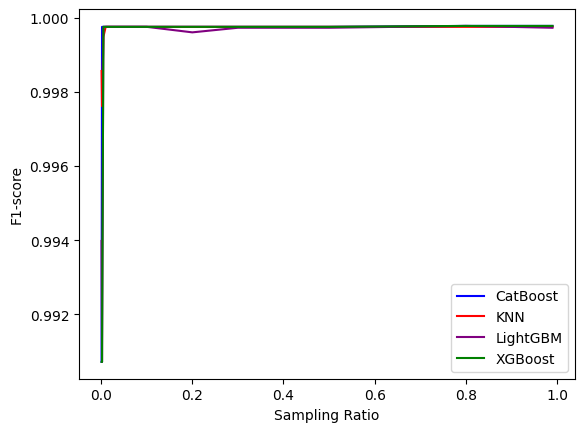

In [219]:
import matplotlib.pyplot as plt

# Filter the results to exclude the specified model
filtered_results = results_df

# Rank the sampling ratios in ascending order
ranked_ratios = filtered_results.groupby('Sampling Ratio')['F1-score'].mean().sort_index(ascending=False).index

# Sort the results by the ranked sampling ratios in descending order
sorted_results = filtered_results.sort_values(by=['Sampling Ratio'], ascending=True)
sorted_results['Sampling Ratio'] = pd.Categorical(sorted_results['Sampling Ratio'], categories=ranked_ratios, ordered=True)

# Define markers and labels for each model
model_markers = {
    'KNN': 'o',
    'XGBoost': 's',
    'CatBoost': 'D',
    'LightGBM': 'v'
}

COLOR_MAP = {
        'KNN': 'red',
        'XGBoost': 'green',
        'CatBoost': 'blue',
        'LightGBM': 'purple'
    }

# Plot the F1 scores for each model with decreasing sampling ratios using different markers and labels
fig, ax = plt.subplots()
for model_name, model_results in sorted_results.groupby('Model'):
    marker = model_markers[model_name]
    label = model_name
    ax.plot(model_results['Sampling Ratio'], model_results['F1-score'], linewidth=1.5, label=label, color=COLOR_MAP[model_name])

# Set plot labels and title
plt.xlabel('Sampling Ratio')
plt.ylabel('F1-score')
# plt.title('F1 Scores for Different Models')

# Show the legend
plt.legend()

# Save the figure with a tight bounding box
# plt.savefig(figure_file, dpi = 300, bbox_inches='tight')

# Show the plot
print(f"Float: {float_number}")
plt.show()

In [220]:
results_df

,Model,Sampling Ratio,Precision,Recall,F1 Score,Cohen's Kappa,F1-score
0,KNN,0.990,1.000000,0.999504,NaN,0.999626,0.999752
1,KNN,0.800,1.000000,0.999504,NaN,0.999626,0.999752
2,KNN,0.500,1.000000,0.999504,NaN,0.999626,0.999752
3,KNN,0.300,1.000000,0.999504,NaN,0.999626,0.999752
4,KNN,0.200,1.000000,0.999504,NaN,0.999626,0.999752
5,KNN,0.100,1.000000,0.999504,NaN,0.999626,0.999752
6,KNN,0.050,1.000000,0.999504,NaN,0.999626,0.999752
7,KNN,0.010,1.000000,0.999504,NaN,0.999626,0.999752
8,KNN,0.005,1.000000,0.998959,NaN,0.999215,0.999479
9,KNN,0.002,1.000000,0.995243,NaN,0.996407,0.997616


In [221]:
filtered_results

,Model,Sampling Ratio,Precision,Recall,F1 Score,Cohen's Kappa,F1-score
0,KNN,0.990,1.000000,0.999504,NaN,0.999626,0.999752
1,KNN,0.800,1.000000,0.999504,NaN,0.999626,0.999752
2,KNN,0.500,1.000000,0.999504,NaN,0.999626,0.999752
3,KNN,0.300,1.000000,0.999504,NaN,0.999626,0.999752
4,KNN,0.200,1.000000,0.999504,NaN,0.999626,0.999752
5,KNN,0.100,1.000000,0.999504,NaN,0.999626,0.999752
6,KNN,0.050,1.000000,0.999504,NaN,0.999626,0.999752
7,KNN,0.010,1.000000,0.999504,NaN,0.999626,0.999752
8,KNN,0.005,1.000000,0.998959,NaN,0.999215,0.999479
9,KNN,0.002,1.000000,0.995243,NaN,0.996407,0.997616
